# Installation

In [1]:
!pip install tnreason

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 466.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_6

# One Hot Encoding

In [1]:
import numpy as np
from tnreason import engine

def create_atomic_oh(dimension, position, color):
  values = np.zeros(dimension)
  values[position] = 1
  return engine.get_core()(values=values, colors=[color])

def create_factored_oh(dimensions, positions, colors):
  return {colorKey + "_ohCore" : create_atomic_oh(dimensions[i], positions[i], colorKey) for i, colorKey in enumerate(colors)}

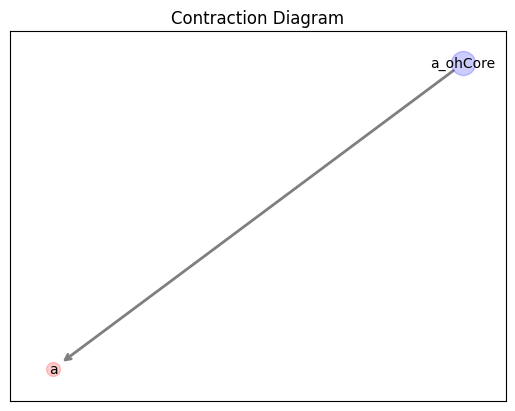

In [2]:
atomic_oh_example = create_atomic_oh(5, 3, "a")
engine.draw_contractionDiagram({"a_ohCore": atomic_oh_example})

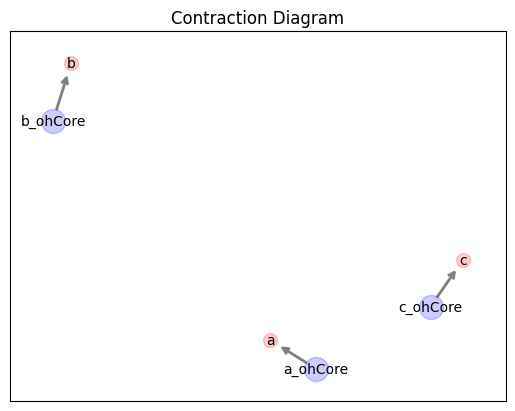

In [3]:
factored_oh_example = create_factored_oh([5, 3, 4], [0, 1, 2], ["a", "b", "c"])
engine.draw_contractionDiagram(factored_oh_example)

# Contraction of Random Tensors


In [4]:
import numpy as np
from tnreason import engine

def random_core(colors, colorShapeDict):
    return engine.get_core()(
        values = np.random.rand(*[colorShapeDict[color] for color in colors]) ,
        colors = colors
    )

In [5]:
colorShapeDict = {
    "a" : 5,
    "b" : 3,
    "c" : 4
}

coreColors = {
    "core1" : ["a", "b"],
    "core2" : ["c"],
    "core3" : ["a", "c"]
}


cores = {coreKey: random_core(coreColors[coreKey], colorShapeDict) for coreKey in coreColors}

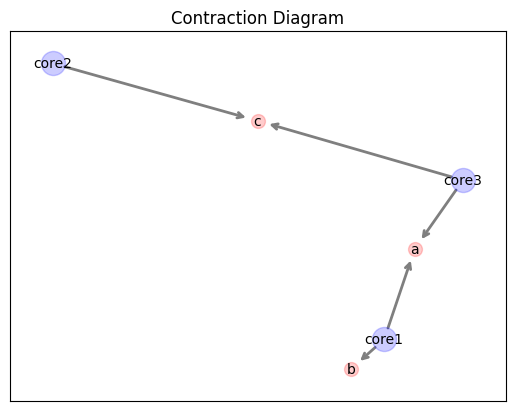

In [6]:
engine.draw_contractionDiagram(cores)

In [7]:
contracted = engine.contract(coreDict=cores, openColors=["a","c"])

In [8]:
contracted.values

array([[4.68461696e-01, 9.80052344e-03, 6.54302027e-02, 1.15985077e-04],
       [6.16821647e-01, 2.21445235e-02, 7.32652633e-02, 6.25518526e-05],
       [1.48791154e+00, 2.68974631e-02, 3.96653946e-02, 1.16584446e-03],
       [2.67863300e-01, 4.57221036e-03, 4.33289940e-02, 8.07465931e-04],
       [4.48289666e-01, 1.07289093e-02, 2.87421045e-01, 7.40705479e-04]])

In [9]:
contracted.colors

['a', 'c']

In [10]:
contracted.values[0, 2]

0.06543020270350199

: 